## Análise de Dados - Gastos Farmacêuticos por País

O Dataset utilizado contém informações sobre Gastos Farmacêuticos por país, cobrindo 50 países com dados que variam de 1970 à 2022. Ele inclui um intersecção de dados completos sobre os gastos em cada País para a década de 2011-2020.

### Atenção
Como pode-se observar, não se tem todos os países de todos os continentes no dataset usado, portanto, a análise feita não reflete o mundo real e é apenas um cenário de estudo e prática de conhecimento estatístico e de técnicas de programação voltadas para Análise de Dados.

In [1]:
# Bibliotecas 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(1788, 7)

In [4]:
df.columns

Index(['LOCATION', 'TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FlAG_CODES',
       'TOTAL_SPEND'],
      dtype='object')

In [5]:
df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FlAG_CODES,TOTAL_SPEND
0,ARG,2004,48.178,-3.414784,12303.221538,A,477560.81
1,ARG,2005,48.558,1.080000,13681.225871,A,536533.75
2,ARG,2006,47.395,7.640000,15090.095978,A,597901.52
3,ARG,2007,31.286,7.835000,16728.642814,A,669426.13
4,ARG,2008,30.262,0.220000,17567.142054,A,710136.75


In [6]:
df.rename(columns={'LOCATION':'PAIS', 'TIME':'ANO', 'PC_HEALTHXP':'PCT_GASTO_SAUDE',
                   'PC_GDP':'PCT_GASTO_PIB', 'USD_CAP':'GASTO_PERCAPITA', 'FlAG_CODES':'COD_FLAG',
       'TOTAL_SPEND':'GASTO_TOTAL'}, inplace=True)

In [7]:
df.columns

Index(['PAIS', 'ANO', 'PCT_GASTO_SAUDE', 'PCT_GASTO_PIB', 'GASTO_PERCAPITA',
       'COD_FLAG', 'GASTO_TOTAL'],
      dtype='object')

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PAIS             1788 non-null   object 
 1   ANO              1788 non-null   int64  
 2   PCT_GASTO_SAUDE  1788 non-null   float64
 3   PCT_GASTO_PIB    1788 non-null   float64
 4   GASTO_PERCAPITA  1788 non-null   float64
 5   COD_FLAG         1788 non-null   object 
 6   GASTO_TOTAL      1788 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 97.9+ KB


### Achando e comprovando janela temporal comum entre os países.

In [9]:
# 1. Agrupando por país e obter os anos únicos para cada país
anos_por_pais = df.groupby('PAIS')['ANO'].unique()

# 2. Encontrando a interseção de anos para todos os países
anos_comuns = set.intersection(*(set(anos) for anos in anos_por_pais))

# 3. Filtrando o DataFrame para incluir apenas os anos que aparecem para cada país
df_filtrado = df[df['ANO'].isin(anos_comuns)]

df_filtrado.head(10)

,PAIS,ANO,PCT_GASTO_SAUDE,PCT_GASTO_PIB,GASTO_PERCAPITA,COD_FLAG,GASTO_TOTAL
7,ARG,2011,60.391,2.533000,682.647,A,28487.31
8,ARG,2012,37.480,-2.430629,1144.778,A,48265.81
9,ARG,2013,35.961,0.940000,1209.008,A,51482.53
10,ARG,2014,34.225,9.671000,1828.845,A,78684.36
11,ARG,2015,25.932,10.229000,417.891,A,18168.65
12,ARG,2016,29.569,0.290000,521.631,A,22899.76
13,ARG,2017,63.629,1.320000,659.479,A,29207.60
14,ARG,2018,61.704,1.090000,880.730,A,39328.89
15,ARG,2019,62.605,2.588000,842.902,A,37908.22
16,ARG,2020,33.454,-1.214675,1443.829,A,65249.47


In [10]:
df_filtrado.tail(10)

,PAIS,ANO,PCT_GASTO_SAUDE,PCT_GASTO_PIB,GASTO_PERCAPITA,COD_FLAG,GASTO_TOTAL
1778,ZAF,2011,46.474,21.180857,11493.283417,A,609088.91
1779,ZAF,2012,7.722,1.013657,1105.479000,A,59455.50
1780,ZAF,2013,45.652,54.240000,13787.935830,A,753907.66
1781,ZAF,2014,46.238,0.709866,1108.303000,A,61615.93
1782,ZAF,2015,46.607,-3.672128,536.733000,A,30445.39
1783,ZAF,2016,5.786,0.310000,67.313000,A,3854.31
1784,ZAF,2017,46.945,2.607000,11920.293955,A,687028.07
1785,ZAF,2018,5.828,27.497037,559.760000,A,32809.21
1786,ZAF,2019,5.719,0.020000,12408.769331,A,739412.32
1787,ZAF,2020,49.060,0.851611,702.082000,A,42519.76


Conclusão: A janela em comum é de 2011 a 2020.

In [11]:
# Exportando arquivo com dataset filtrado
df_filtrado = df[(df['ANO'] >= 2011) & (df['ANO'] <= 2020)]

df_filtrado.to_csv('dataset_filtrado.csv', index=False)

print("Arquivo 'dataset_filtrado.csv' criado com sucesso!")

Arquivo 'dataset_filtrado.csv' criado com sucesso!


## Análise Exploratória dos Dados

### Os 10 países que mais gastaram

In [12]:
gastos_por_pais = df_filtrado.groupby("PAIS")["GASTO_TOTAL"].sum()

top_10_paises = gastos_por_pais.sort_values(ascending=False).head(10)

print(top_10_paises)

PAIS
USA    1.555153e+08
CHN    7.824330e+07
JPN    5.169099e+07
IND    2.448688e+07
DEU    1.834348e+07
FRA    1.271776e+07
MEX    1.186455e+07
ESP    1.063334e+07
GBR    1.060820e+07
KOR    1.032563e+07
Name: GASTO_TOTAL, dtype: float64


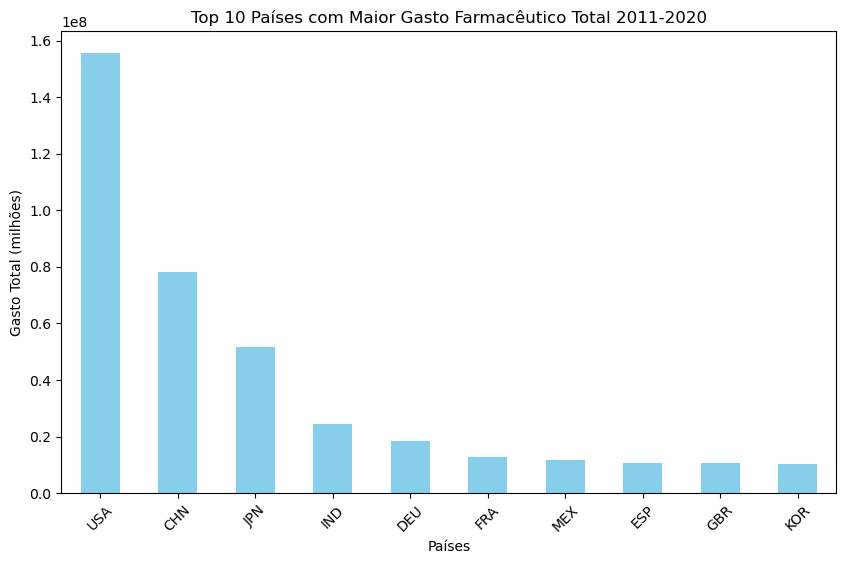

In [13]:
# Grafico de Barras com os 10 países que mais gastaram
plt.figure(figsize=(10, 6))
top_10_paises.plot(kind="bar", color='skyblue')
plt.title("Top 10 Países com Maior Gasto Farmacêutico Total 2011-2020")
plt.xlabel("Países")
plt.ylabel("Gasto Total (milhões)")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Os 15 países que mais gastaram
top_15_paises = gastos_por_pais.nlargest(15).index 

df_top_15 = df_filtrado[df_filtrado['PAIS'].isin(top_15_paises)]

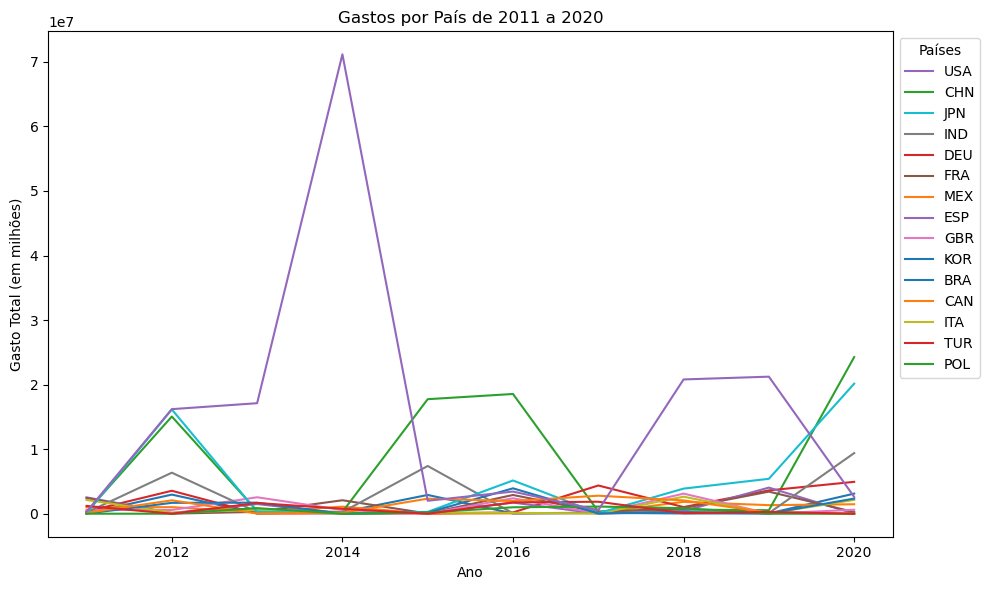

In [15]:
# Gráfico de linha para mostrar o gasto total por país ao longo dos anos
plt.figure(figsize=(10, 6))

# Armazenando os rótulos de países e suas linhas
linhas = []
rotulos = []

for pais in df_top_15['PAIS'].unique():
    pais_data = df_top_15[df_top_15['PAIS'] == pais]
    linha, = plt.plot(pais_data['ANO'], pais_data['GASTO_TOTAL'], label=pais)
    linhas.append(linha)
    rotulos.append(pais)
    
# Ordenando os rótulos e linhas de acordo com os gastos totais
gastos_totais = gastos_por_pais[top_15_paises]  
ordenados = gastos_totais.sort_values(ascending=False).index.tolist() 

# Reorganizando as linhas e rótulos (maior -> menor)
linhas_ordenadas = [linhas[rotulos.index(pais)] for pais in ordenados]
rotulos_ordenados = [pais for pais in ordenados]

# Título e rótulos
plt.title('Gastos por País de 2011 a 2020')
plt.xlabel('Ano')
plt.ylabel('Gasto Total (em milhões)')

# legenda
plt.legend(linhas_ordenadas, rotulos_ordenados, title="Países", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Análises Estatísticas e Insights Mais Profundos

A seguir, exploraremos correlações, médias móveis e clusters de países.

### Correlação entre Percentual do PIB Gasto e o Gasto Total

Pode-se verificar se existe uma relação entre PCT_GASTO_PIB (percentual do PIB gasto em produtos farmacêuticos) e GASTO_TOTAL (gasto total em milhões).

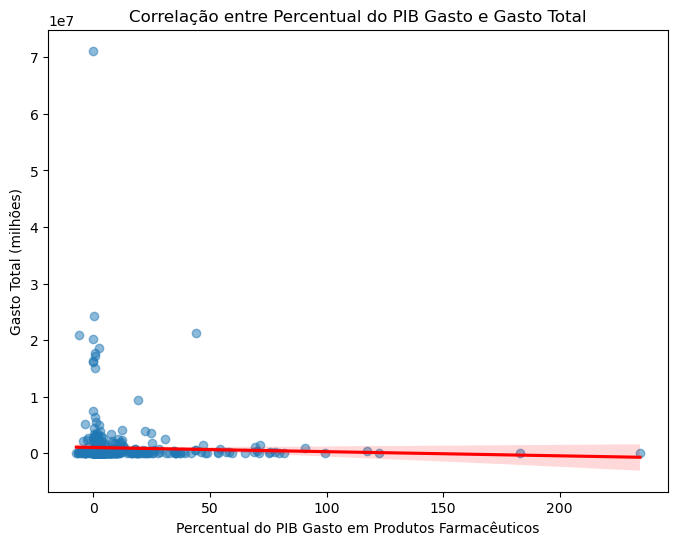

In [16]:
# Criando um gráfico de dispersão com linha de tendência
plt.figure(figsize=(8, 6))
sns.regplot(x=df_filtrado["PCT_GASTO_PIB"], y=df_filtrado["GASTO_TOTAL"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Correlação entre Percentual do PIB Gasto e Gasto Total")
plt.xlabel("Percentual do PIB Gasto em Produtos Farmacêuticos")
plt.ylabel("Gasto Total (milhões)")
plt.show()

### Calculando a correlação
Calcula o coeficiente de correlação de Pearson.
Se a correlação for próxima de 1 ou -1, indica uma forte relação entre essas variáveis.

In [17]:
correlacao = df_filtrado[["PCT_GASTO_PIB", "GASTO_TOTAL"]].corr()
print(correlacao)

               PCT_GASTO_PIB  GASTO_TOTAL
PCT_GASTO_PIB       1.000000    -0.037335
GASTO_TOTAL        -0.037335     1.000000


### Média Móvel para Identificar Tendências
A média móvel ajuda a suavizar as flutuações e identificar tendências de gastos ao longo do tempo.
Isso ajuda a visualizar se os gastos estão aumentando ou diminuindo ao longo do tempo.

C:\Users\giova\AppData\Local\Temp\ipykernel_20348\4283645824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MEDIA_MOVEL'] = df_filtrado.groupby('PAIS')['GASTO_TOTAL'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


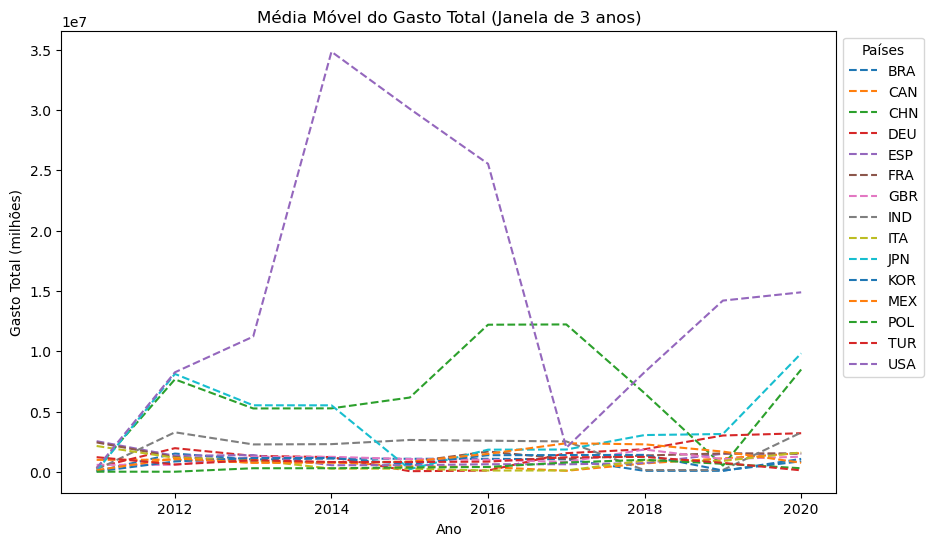

In [28]:
df_filtrado['MEDIA_MOVEL'] = df_filtrado.groupby('PAIS')['GASTO_TOTAL'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(10, 6))

for pais in df_top_15['PAIS'].unique():
    pais_data = df_filtrado[df_filtrado['PAIS'] == pais]
    plt.plot(pais_data['ANO'], pais_data['MEDIA_MOVEL'], label=pais, linestyle='dashed')

plt.title("Média Móvel do Gasto Total (Janela de 3 anos)")
plt.xlabel("Ano")
plt.ylabel("Gasto Total (milhões)")
plt.legend(title="Países", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Clusters de Países (K-Means)
Agrupando os países em categorias de gastos similares.
Isso categoriza os países em grupos distintos, como alto, médio e baixo gasto.

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
X = df_filtrado.groupby("PAIS")[["PCT_GASTO_PIB", "GASTO_TOTAL"]].mean()

# Normalizando os dados para evitar distorções
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
X["Cluster"] = kmeans.fit_predict(X_scaled)

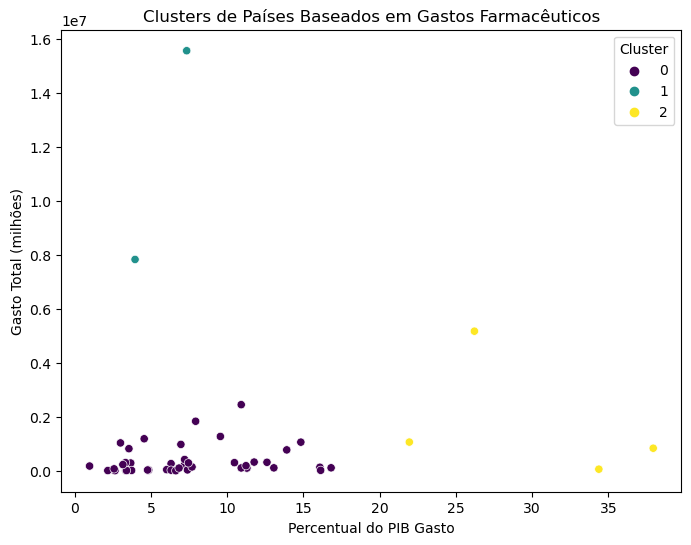

In [21]:
# Visualizando os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["PCT_GASTO_PIB"], y=X["GASTO_TOTAL"], hue=X["Cluster"], palette="viridis")
plt.title("Clusters de Países Baseados em Gastos Farmacêuticos")
plt.xlabel("Percentual do PIB Gasto")
plt.ylabel("Gasto Total (milhões)")
plt.show()

### Comparações Regionais e Insights Econômicos

Criando uma coluna com o continente que cada país pertence:

In [22]:
paises = df['PAIS'].unique()
print(paises)

['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI'
 'CYP' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN'
 'IDN' 'IND' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX'
 'MLT' 'NLD' 'NOR' 'NZL' 'PER' 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'TUR'
 'USA' 'ZAF']


In [30]:
continentes_dict = {
    'ARG': 'América do Sul', 'AUS': 'Oceania', 'AUT': 'Europa', 'BEL': 'Europa', 'BGR': 'Europa', 
    'BRA': 'América do Sul', 'CAN': 'América do Norte', 'CHE': 'Europa', 'CHL': 'América do Sul', 
    'CHN': 'Ásia', 'COL': 'América do Sul', 'CRI': 'América Central', 'CYP': 'Europa', 'CZE': 'Europa', 
    'DEU': 'Europa', 'DNK': 'Europa', 'ESP': 'Europa', 'EST': 'Europa', 'FIN': 'Europa', 'FRA': 'Europa', 
    'GBR': 'Europa', 'GRC': 'Europa', 'HRV': 'Europa', 'HUN': 'Europa', 'IDN': 'Ásia', 'IND': 'Ásia', 
    'IRL': 'Europa', 'ISL': 'Europa', 'ISR': 'Ásia', 'ITA': 'Europa', 'JPN': 'Ásia', 'KOR': 'Ásia', 
    'LTU': 'Europa', 'LUX': 'Europa', 'LVA': 'Europa', 'MEX': 'América do Norte', 'MLT': 'Europa', 
    'NLD': 'Europa', 'NOR': 'Europa', 'NZL': 'Oceania', 'PER': 'América do Sul', 'POL': 'Europa', 
    'PRT': 'Europa', 'ROU': 'Europa', 'SVK': 'Europa', 'SVN': 'Europa', 'SWE': 'Europa', 'TUR': 'Ásia', 
    'USA': 'América do Norte', 'ZAF': 'África'
}

df_filtrado['CONTINENTE'] = df_filtrado['PAIS'].map(continentes_dict)

print(df_filtrado)

     PAIS   ANO  PCT_GASTO_SAUDE  PCT_GASTO_PIB  GASTO_PERCAPITA COD_FLAG  \
7     ARG  2011           60.391       2.533000       682.647000        A   
8     ARG  2012           37.480      -2.430629      1144.778000        A   
9     ARG  2013           35.961       0.940000      1209.008000        A   
10    ARG  2014           34.225       9.671000      1828.845000        A   
11    ARG  2015           25.932      10.229000       417.891000        A   
...   ...   ...              ...            ...              ...      ...   
1783  ZAF  2016            5.786       0.310000        67.313000        A   
1784  ZAF  2017           46.945       2.607000     11920.293955        A   
1785  ZAF  2018            5.828      27.497037       559.760000        A   
1786  ZAF  2019            5.719       0.020000     12408.769331        A   
1787  ZAF  2020           49.060       0.851611       702.082000        A   

      GASTO_TOTAL    MEDIA_MOVEL      continente      CONTINENTE  
7       

C:\Users\giova\AppData\Local\Temp\ipykernel_20348\714780514.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['CONTINENTE'] = df_filtrado['PAIS'].map(continentes_dict)


In [32]:
gastos_continente = df_filtrado.groupby("CONTINENTE")["GASTO_TOTAL"].sum().sort_values(ascending=False)

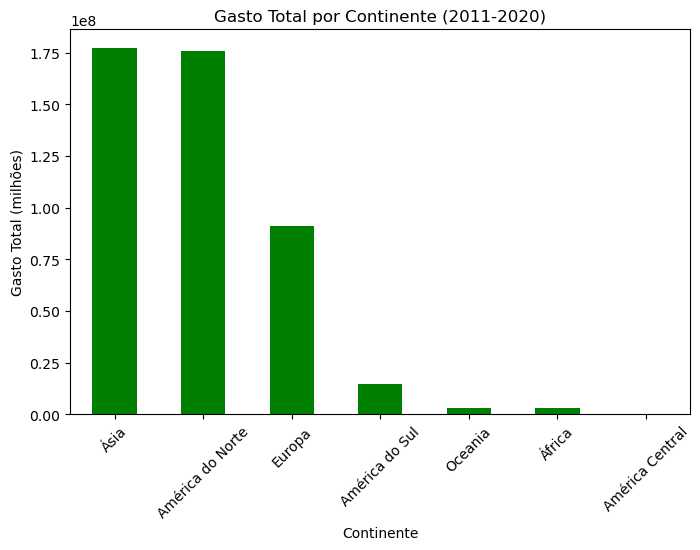

In [33]:
plt.figure(figsize=(8, 5))
gastos_continente.plot(kind="bar", color="green")
plt.title("Gasto Total por Continente (2011-2020)")
plt.xlabel("Continente")
plt.ylabel("Gasto Total (milhões)")
plt.xticks(rotation=45)
plt.show()

In [37]:
continentes_grupo = df_filtrado.groupby('CONTINENTE')['PAIS'].unique()

for continente, paises in continentes_grupo.items():
    print(f"Continente: {continente}")
    print(f"Países: {', '.join(paises)}\n")


Continente: América Central
Países: CRI

Continente: América do Norte
Países: CAN, MEX, USA

Continente: América do Sul
Países: ARG, BRA, CHL, COL, PER

Continente: Europa
Países: AUT, BEL, BGR, CHE, CYP, CZE, DEU, DNK, ESP, EST, FIN, FRA, GBR, GRC, HRV, HUN, IRL, ISL, ITA, LTU, LUX, LVA, MLT, NLD, NOR, POL, PRT, ROU, SVK, SVN, SWE

Continente: Oceania
Países: AUS, NZL

Continente: África
Países: ZAF

Continente: Ásia
Países: CHN, IDN, IND, ISR, JPN, KOR, TUR



## Atenção
Como pode-se observar, não se tem todos os países de todos os continentes no dataset usado, portanto, a analise não reflete o mundo real. Esta análise é apenas um cenário de estudo e prática de conhecimento estatístico e de técnicas de programação voltada para Análise de Dados.